In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
faces = fetch_lfw_people()

In [4]:
faces.data.shape

(13233, 2914)

In [5]:
faces.target_names.shape

(5749,)

In [6]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
pd.DataFrame(faces.target)[0].value_counts()

1871    530
1047    236
5458    144
1404    121
1892    109
373      77
2175     71
2941     60
2453     55
2682     53
4963     52
2288     52
5569     49
3401     48
1933     44
385      42
2507     42
3202     41
3351     41
2043     39
127      39
4057     37
248      36
210      35
5039     33
5428     33
3704     33
4773     32
3127     32
5541     32
       ... 
1708      1
3757      1
1716      1
3765      1
3773      1
1732      1
3781      1
1740      1
1748      1
3797      1
3805      1
3733      1
1684      1
3725      1
3693      1
3661      1
1620      1
5718      1
5726      1
1636      1
1644      1
5742      1
1676      1
1652      1
3701      1
1660      1
3709      1
1668      1
3717      1
0         1
Name: 0, Length: 5749, dtype: int64

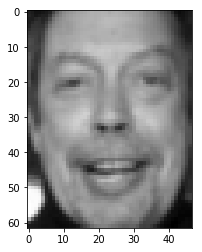

In [9]:
plt.imshow(faces.data[0].reshape(62,47),cmap="gray")

In [10]:
#人脸照片的数分布不均衡，取至少有70张的
#resize  压缩照片  
#min_faces_per_person  保证每个人的最小照片个数
face_dic = fetch_lfw_people(min_faces_per_person=70,resize=0.4)

In [11]:
face_dic.data.shape

(1288, 1850)

In [12]:
face_dic.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [13]:
train = face_dic.data
target = face_dic.target
target_names= face_dic.target_names

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [15]:
%%time

knn.fit(train,target)

Wall time: 305 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [17]:
%%time
lr.fit(train,target)

Wall time: 7 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
%%time
lr.predict(train)

Wall time: 175 ms


array([5, 6, 3, ..., 5, 3, 5], dtype=int64)

In [19]:
lr.score(train,target)

1.0

In [20]:
knn.score(train,target)

0.7445652173913043

In [21]:
face_dic = fetch_lfw_people(min_faces_per_person=70,resize=1)

In [22]:
train = face_dic.data
target = face_dic.target
target_names = face_dic.target_names

In [23]:
train.shape

(1288, 11750)

In [24]:
knn = KNeighborsClassifier()

In [25]:
%%time
knn.fit(train,target)

Wall time: 597 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
%%time
knn.score(train,target)

Wall time: 40.7 s


0.7531055900621118

In [29]:
lr = LogisticRegression()

In [30]:
%%time
lr.fit(train,target)

Wall time: 34.6 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
%%time
lr.score(train,target)

Wall time: 93.2 ms


1.0

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.2,random_state=3)

In [34]:
from sklearn.svm import SVC

In [35]:
svc = SVC(kernel="rbf")

In [36]:
%%time
svc.fit(X_train,y_train)

Wall time: 39.2 s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
from sklearn.decomposition import PCA
#pca降维
pca = PCA(n_components=0.98)

In [42]:
pca_train = pca.fit_transform(train)

In [43]:
pca_train.shape

(1288, 415)

In [44]:
%%time
svc.fit(pca_train,target)

Wall time: 2.42 s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
svc.score(pca_train,target)

1.0

In [52]:
#找到最优解  网格搜索
face1 = fetch_lfw_people(min_faces_per_person=30,resize=1)

In [53]:
face1.data.shape

(2370, 11750)

In [1]:
face1

NameError: name 'face1' is not defined